# Семинар 3. Практика. Векторные вычисления и метод $k$ ближайших соседей.

## 1. Векторные вычисления в numpy

In [1]:
import numpy as np
import time

#### Перемножение векторов

In [2]:
a = np.random.normal(size = (10000000,))
b = np.random.normal(size = (10000000,))

In [3]:
start = time.clock()
c = [a[i] * b[i] for i in range(a.size)]
print time.clock() - start

3.696027


In [4]:
start = time.clock()
c = a * b
print time.clock() - start

0.159497


#### Масштабирование признаков

In [5]:
def scale(X, alg):
    if alg == 'stupid':
        for i in range(X.shape[1]):
            col = X[:, i]
            X[:, i] = (col - col.mean()) / col.std()
    elif alg == 'fast':
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    return X

In [6]:
X = np.random.normal(10, 5, size=(100000, 1000))

In [7]:
start = time.clock()
X1 = scale(X, 'stupid')
print time.clock() - start

11.119038


In [8]:
start = time.clock()
X1 = scale(X, 'fast')
print time.clock() - start

3.414175


#### Поиск максимума

In [9]:
a = np.random.normal(size=(10000, 10000))

In [10]:
start = time.clock()
res = -np.inf
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        res = max(res, a[i, j])
print res
print time.clock() - start

5.42349174454
44.209762


In [11]:
start = time.clock()
print np.amax(a)
print time.clock() - start

5.42349174454
0.108158


## 2. kNN

#### Данные MNIST

In [12]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [13]:
from sklearn.cross_validation import train_test_split
?train_test_split

In [14]:
a = [1, 2, 3, 4, 5]
b = ["one", "two", "three", "four", "five"]
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=2)
print a_train, b_train

[5, 2, 1] ['five', 'two', 'one']


In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target,
                                                    test_size=0.3, random_state=73)

In [16]:
X_train.shape

(49000, 784)

In [17]:
X_test.shape

(21000, 784)

In [18]:
y_train[:100]

array([ 0.,  5.,  4.,  3.,  9.,  4.,  1.,  3.,  5.,  3.,  0.,  2.,  4.,
        7.,  3.,  7.,  1.,  0.,  8.,  2.,  8.,  6.,  4.,  5.,  0.,  9.,
        1.,  6.,  1.,  0.,  4.,  9.,  9.,  2.,  9.,  5.,  2.,  2.,  8.,
        0.,  9.,  8.,  5.,  4.,  0.,  9.,  2.,  0.,  9.,  1.,  4.,  8.,
        3.,  0.,  5.,  9.,  0.,  0.,  3.,  2.,  1.,  5.,  4.,  2.,  1.,
        7.,  1.,  0.,  4.,  1.,  5.,  4.,  5.,  1.,  2.,  5.,  9.,  6.,
        7.,  5.,  1.,  5.,  2.,  3.,  3.,  6.,  3.,  9.,  1.,  4.,  7.,
        5.,  4.,  8.,  0.,  0.,  4.,  7.,  3.,  3.])

#### kNN "в лоб"

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [21]:
np.random.normal(loc=199, size=(3, 3))

array([[ 198.73942771,  199.20029295,  198.35191465],
       [ 198.5370844 ,  199.42283033,  199.11188965],
       [ 201.22585579,  199.85180328,  197.60101931]])

In [20]:
sc = StandardScaler()
sc.fit_transform(np.random.normal(loc=199, size=(3, 3)))

array([[-1.1754646 , -1.24434579, -0.17214826],
       [-0.0932319 ,  0.04019122,  1.3017113 ],
       [ 1.2686965 ,  1.20415457, -1.12956304]])

In [22]:
?KNeighborsClassifier

In [23]:
def get_knn_qual(X_train, y_train, X_test, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train_scaled, y_train)
    
    start = time.clock()
    pred_test = clf.predict(X_test_scaled)
    print "Prediction time:", time.clock() - start
    
    score = accuracy_score(y_test, pred_test)
    print "Accuracy:", score
    return score

In [15]:
get_knn_qual(X_train, y_train, X_test, y_test)

Prediction time: 1106.812702
Accuracy: 0.94419047619


/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:332: UserWarning: StandardScaler assumes floating point values as input, got uint8
  "got %s" % (estimator, X.dtype))


0.94419047619047614

#### kNN с хэшированием признаков

In [24]:
hashes = np.random.normal(size=(X_train.shape[1], 10))

In [25]:
X_train_hashed = (X_train.dot(hashes) > 0).astype(np.float)
X_test_hashed = (X_test.dot(hashes) > 0).astype(np.float)

In [26]:
X_train_hashed[0, :]

array([ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.])

In [27]:
get_knn_qual(X_train_hashed, y_train, X_test_hashed, y_test)

Prediction time: 6.123459
Accuracy: 0.344857142857


0.34485714285714286

In [28]:
X_train_hashed = X_train.dot(hashes)
X_test_hashed = X_test.dot(hashes)

In [29]:
X_train_hashed[0, :]

array([ 1995.50661214, -3111.20688797, -1255.96990926, -2502.69702454,
         654.37073255, -1311.17399339,  1910.70045214,  -420.03638029,
        -598.6087721 ,  1139.11562761])

In [30]:
get_knn_qual(X_train_hashed, y_train, X_test_hashed, y_test)

Prediction time: 7.54431
Accuracy: 0.641571428571


0.64157142857142857

In [12]:
hash_sizes = [1, 10, 20, 30, 40, 50]
quals = []
for hs in hash_sizes:
    hashes = np.random.normal(size=(X_train.shape[1], hs))
    X_train_hashed = X_train.dot(hashes)
    X_test_hashed = X_test.dot(hashes)
    q = get_knn_qual(X_train_hashed, y_train, X_test_hashed, y_test)
    quals.append(q)

Prediction time: 0.093096
Accuracy: 0.120476190476
Prediction time: 6.107643
Accuracy: 0.62
Prediction time: 58.593505
Accuracy: 0.850428571429
Prediction time: 103.287555
Accuracy: 0.90219047619
Prediction time: 152.594035
Accuracy: 0.932047619048
Prediction time: 181.292196
Accuracy: 0.944142857143


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

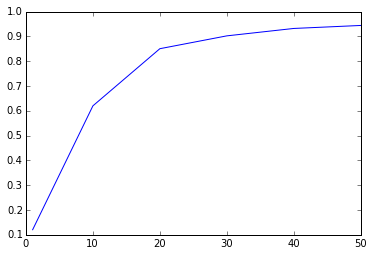

In [14]:
plt.plot(hash_sizes, quals)

#### Настройка k в kNN

Данные: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names

In [31]:
import pandas
import urllib2

WINE_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

wine_data = pandas.read_csv(WINE_DATA_URL, header=None, delimiter=',')
 
X, y = wine_data.ix[:, 1:].values, wine_data.ix[:, 0].values
 
wine_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [32]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [33]:
wine_data.shape

(178, 14)

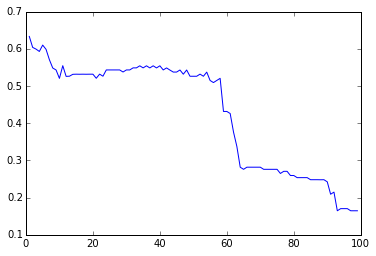

In [36]:
from sklearn.cross_validation import KFold, cross_val_score

cv = KFold(n=len(y), n_folds=5)

k_vals = np.arange(1, 100, 1)
quality_by_k = [
    cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=cv).mean()
    for k in k_vals
]

plt.plot(k_vals, quality_by_k)

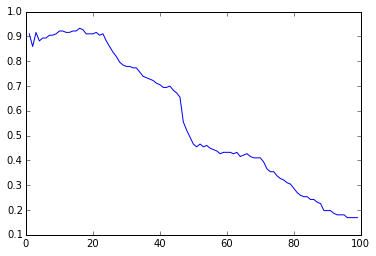

In [37]:
from sklearn.preprocessing import scale

X = scale(X)
quality_by_k = [
    cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=cv).mean()
    for k in k_vals
]

plt.plot(k_vals, quality_by_k)

In [50]:
k_vals[np.argmax(quality_by_k)]

16

#### Выбор метрики

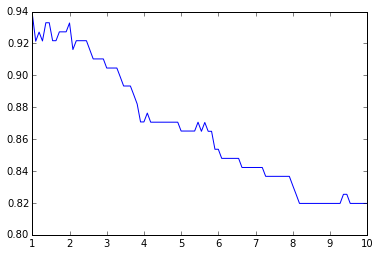

In [51]:
p_vals = np.linspace(1, 10, 100)
quality_by_p = [
    cross_val_score(KNeighborsClassifier(n_neighbors=16, metric='minkowski', p=p), X, y, cv=cv).mean()
    for p in p_vals
]
plt.plot(p_vals, quality_by_p)

In [52]:
p_vals[np.argmax(quality_by_p)]

1.0